In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 --------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100                                   # 데이터의 수
K = 3                                         # 분포 수

T3 = np.zeros((N, 3), dtype=np.uint8)
X  = np.zeros((N, 2))

Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]])  #  분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])        #  분포의 분산
Pi  =  np.array([0.4, 0.8, 1])                             # (A) 각 분포에 대한 비율 0.4 0.8 1

for i in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[i, k] = 1
            break
    for k in range(2):
        X[i, k] = (np.random.randn() * Sig[T3[i, :] == 1, k] + Mu[T3[i, :] == 1, k])

In [35]:
# 리스트 6-2-(12)
# 3 클래스 용 로지스틱 회귀 모델 -----------------

def  logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
#     print(y)
    wk = np.sum(y, axis=1)
#     print(wk)
    wk = y.T / wk
    y = wk.T
    return y

# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:5, 0], X[:5, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]
 [0.    0.    1.   ]
 [0.019 0.126 0.856]]


In [5]:
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee

# 교차 엔트로피 오차의 미분 

def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3))
              # (클래스의 수 K) x (x의 차원 D+1)

    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)

In [13]:
# 매개 변수 검색

def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method='CG')
    return res.x

# 모델 등고선 2D 표시
def show_contour_logistic3(w):
    xn = 30 
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)
    
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],  linestyle='none', markeredgecolor='black', marker='o', color=c[k], alpha=0.8)
        plt.grid(True)

	 dcee_out = 
 [ 0.03778433  0.03708109 -0.1841851  -0.21235188 -0.44408101 -0.38340835
  0.17456754  0.40699992  0.56759346]
	 W = 
 [[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


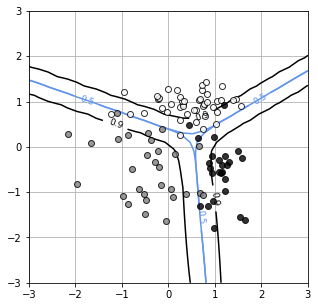

In [36]:
from scipy.optimize import minimize


X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용

# 테스트
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_out = dcee_logistic3(W, X, T3)
print('\t dcee_out = \n' ,dcee_out)

# 메인
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print('\t W = \n',np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(5, 5))

show_contour_logistic3(W)
show_data2(X, T3)

plt.show()

	 dcee_out = 
 [ 0.03778433  0.03708109 -0.1841851  -0.21235188 -0.44408101 -0.38340835
  0.17456754  0.40699992  0.56759346]
	 W = 
 [[-2.68 -2.23  1.66]
 [-0.17  3.9  -0.53]
 [ 2.86 -1.67 -1.13]]
CEE = 0.23


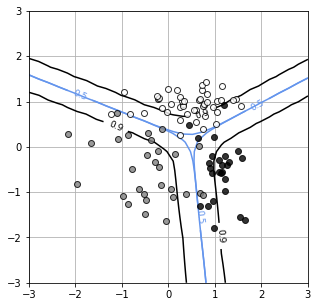

In [42]:
# from scipy.optimize import minimize


X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용

# 테스트
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_out = dcee_logistic3(W, X, T3)
print('\t dcee_out = \n' ,dcee_out)

# 메인
W = np.zeros((9,))
for i in range(200):
    W -= dcee_logistic3(W, X, T3)
#     print(cee_logistic3(W,X,T3))
    
print('\t W = \n',np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(5, 5))

show_contour_logistic3(W)
show_data2(X, T3)

plt.show()

In [29]:
w = np.arange(9)
x = np.array(range(10)).reshape(2,5).T
t = np.array([1,0,0,0,1,0,1,0,0,0,1,0,0,0,1]).reshape(3,5).T

In [43]:
cee_logistic3(w,x,t)

28.800000006099545

In [31]:
dcee_logistic3(w, x, t)

[[1.09663316e+03 7.20048993e+10 4.72783947e+18]
 [2.98095799e+03 7.89629602e+13 2.09165950e+24]
 [8.10308393e+03 8.65934004e+16 9.25378173e+29]
 [2.20264658e+04 9.49611942e+19 4.09399696e+35]
 [5.98741417e+04 1.04137594e+23 1.81123908e+41]]
[4.72783954e+18 2.09165950e+24 9.25378173e+29 4.09399696e+35
 1.81123908e+41]


array([-0.8       , -2.8       , -0.4       , -0.2       , -1.19999998,
       -0.2       ,  1.2       ,  4.19999998,  0.6       ])